In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/TrainingData.csv')

In [3]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
Id                   252000 non-null int64
Income               252000 non-null int64
Age                  252000 non-null int64
Experience           252000 non-null int64
Married/Single       252000 non-null object
House_Ownership      252000 non-null object
Car_Ownership        252000 non-null object
Profession           252000 non-null object
CITY                 252000 non-null object
STATE                252000 non-null object
CURRENT_JOB_YRS      252000 non-null int64
CURRENT_HOUSE_YRS    252000 non-null int64
Risk_Flag            252000 non-null int64
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


/home/marek/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/marek/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


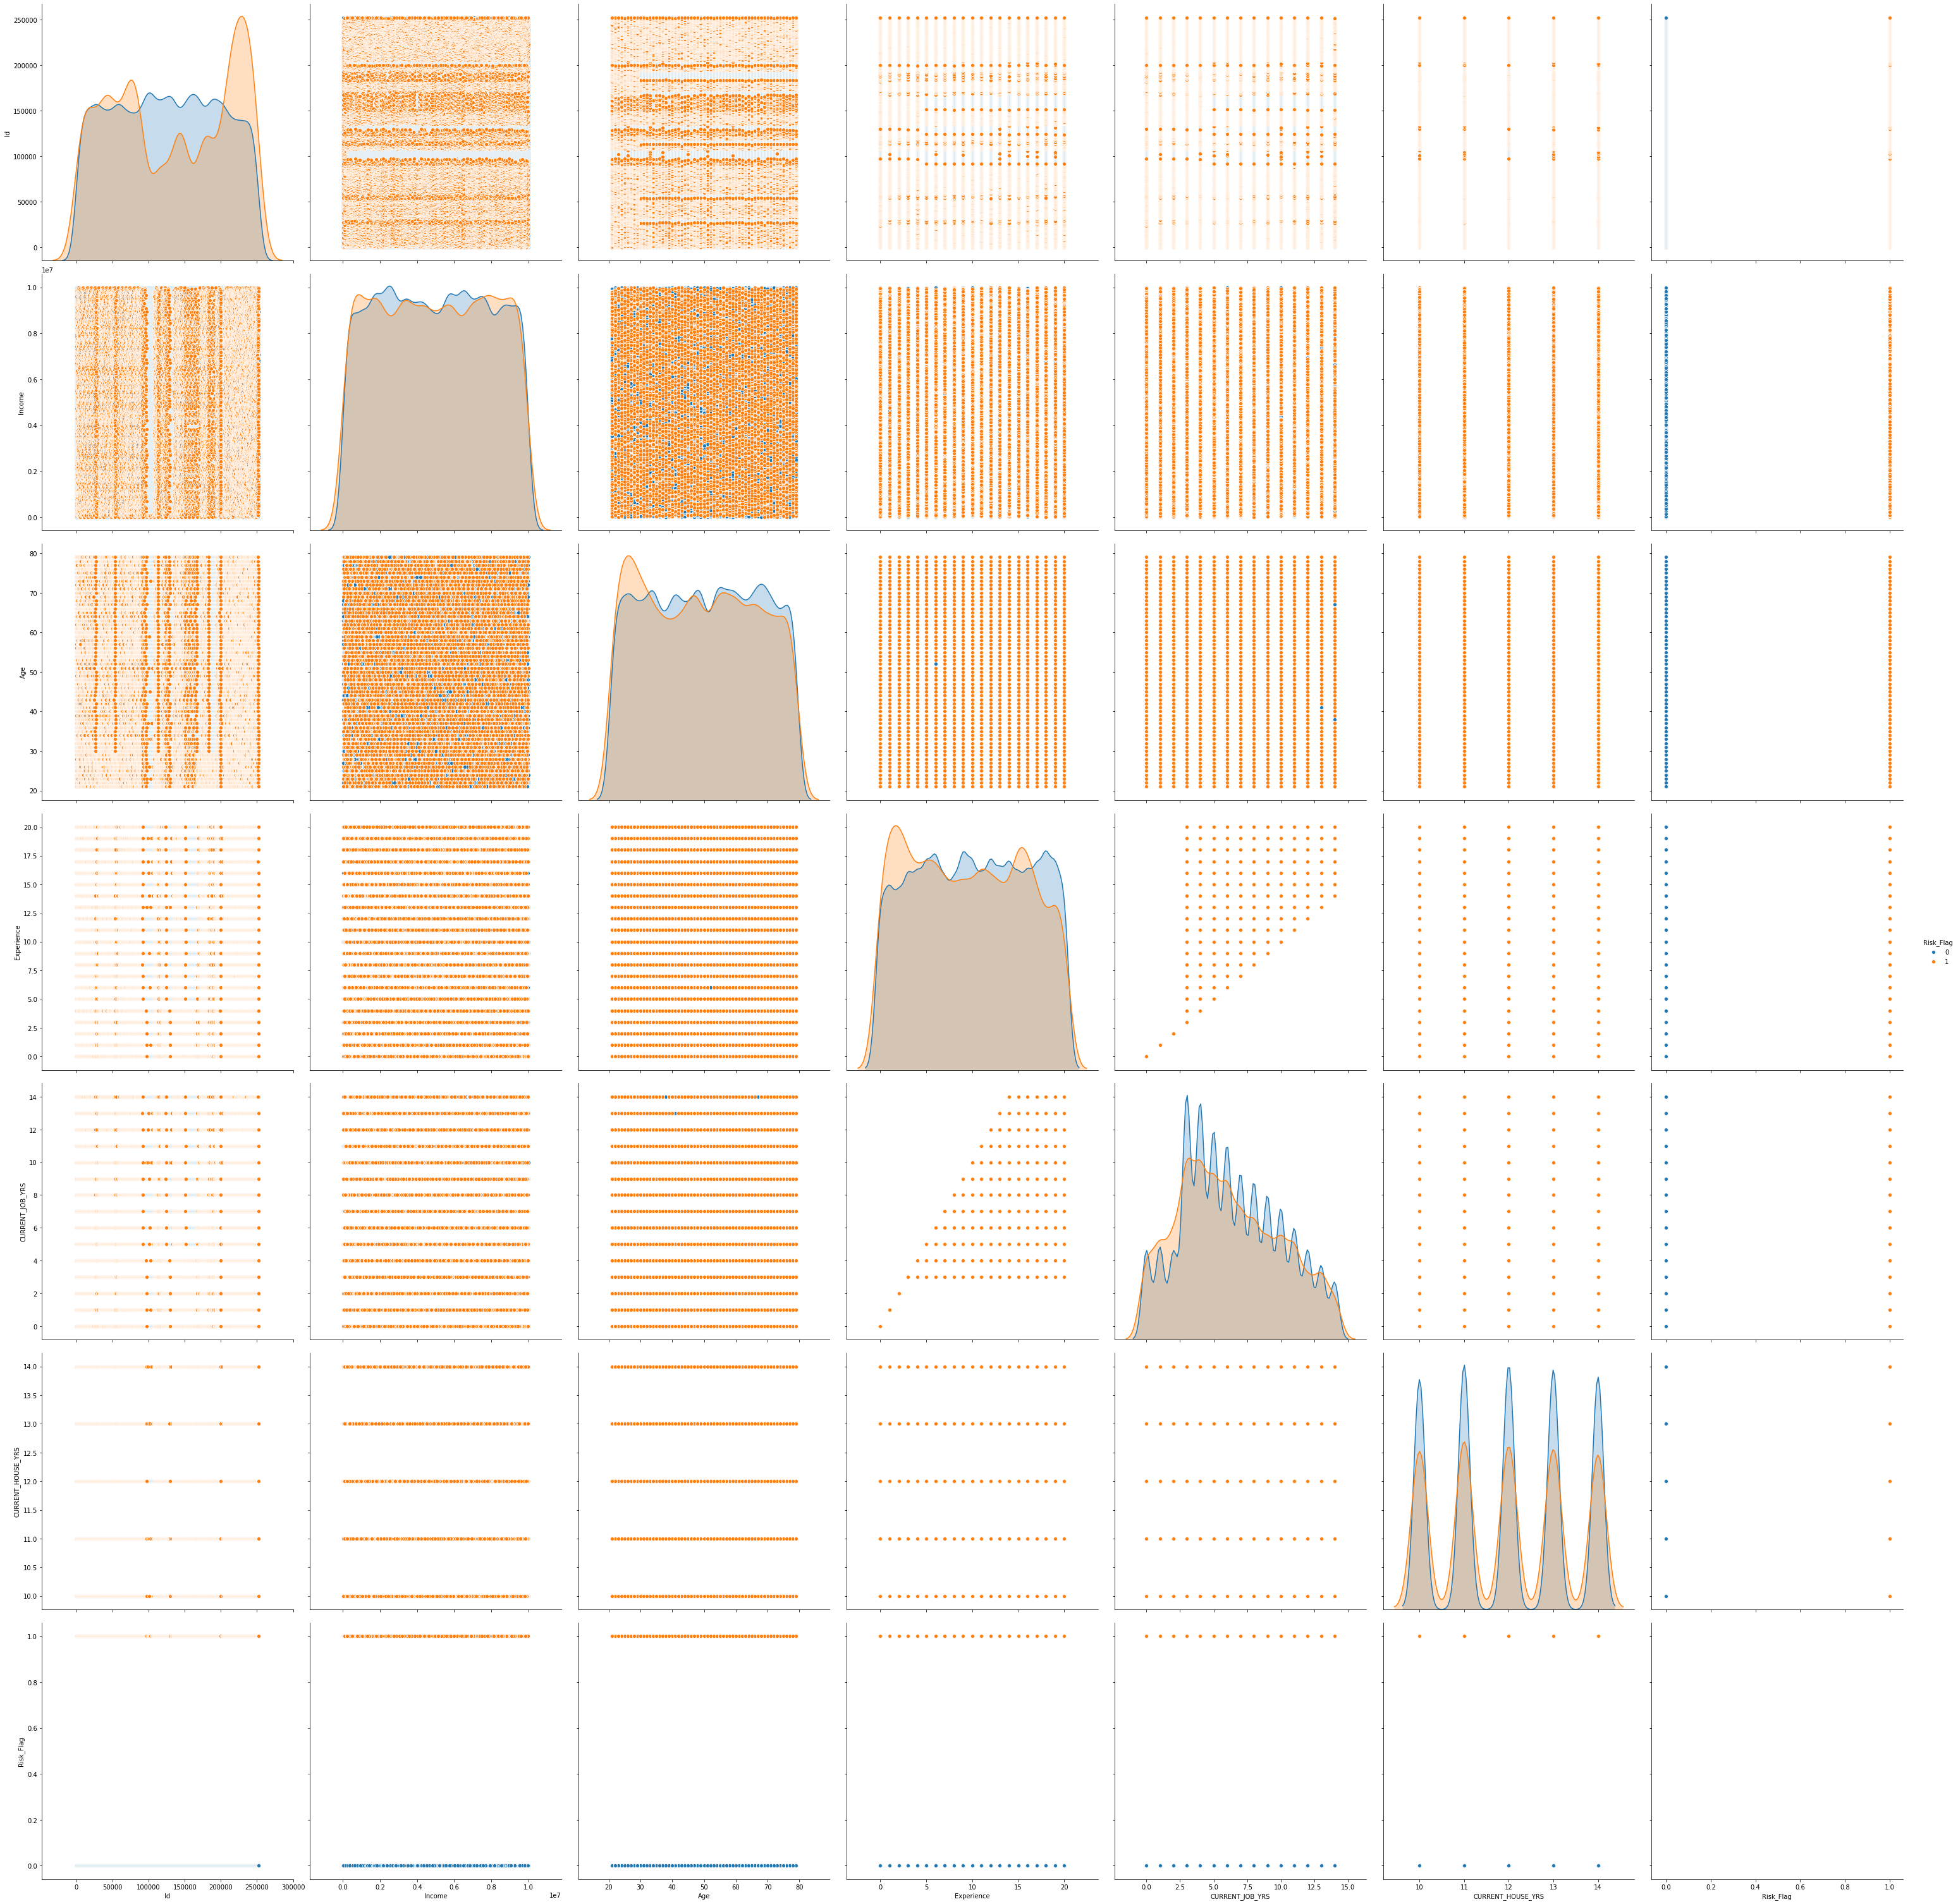

In [7]:
# df.plot(kind='kde', y='Age', hue='Risk_Flag')
sns.pairplot(data=df, hue='Risk_Flag', height=6)

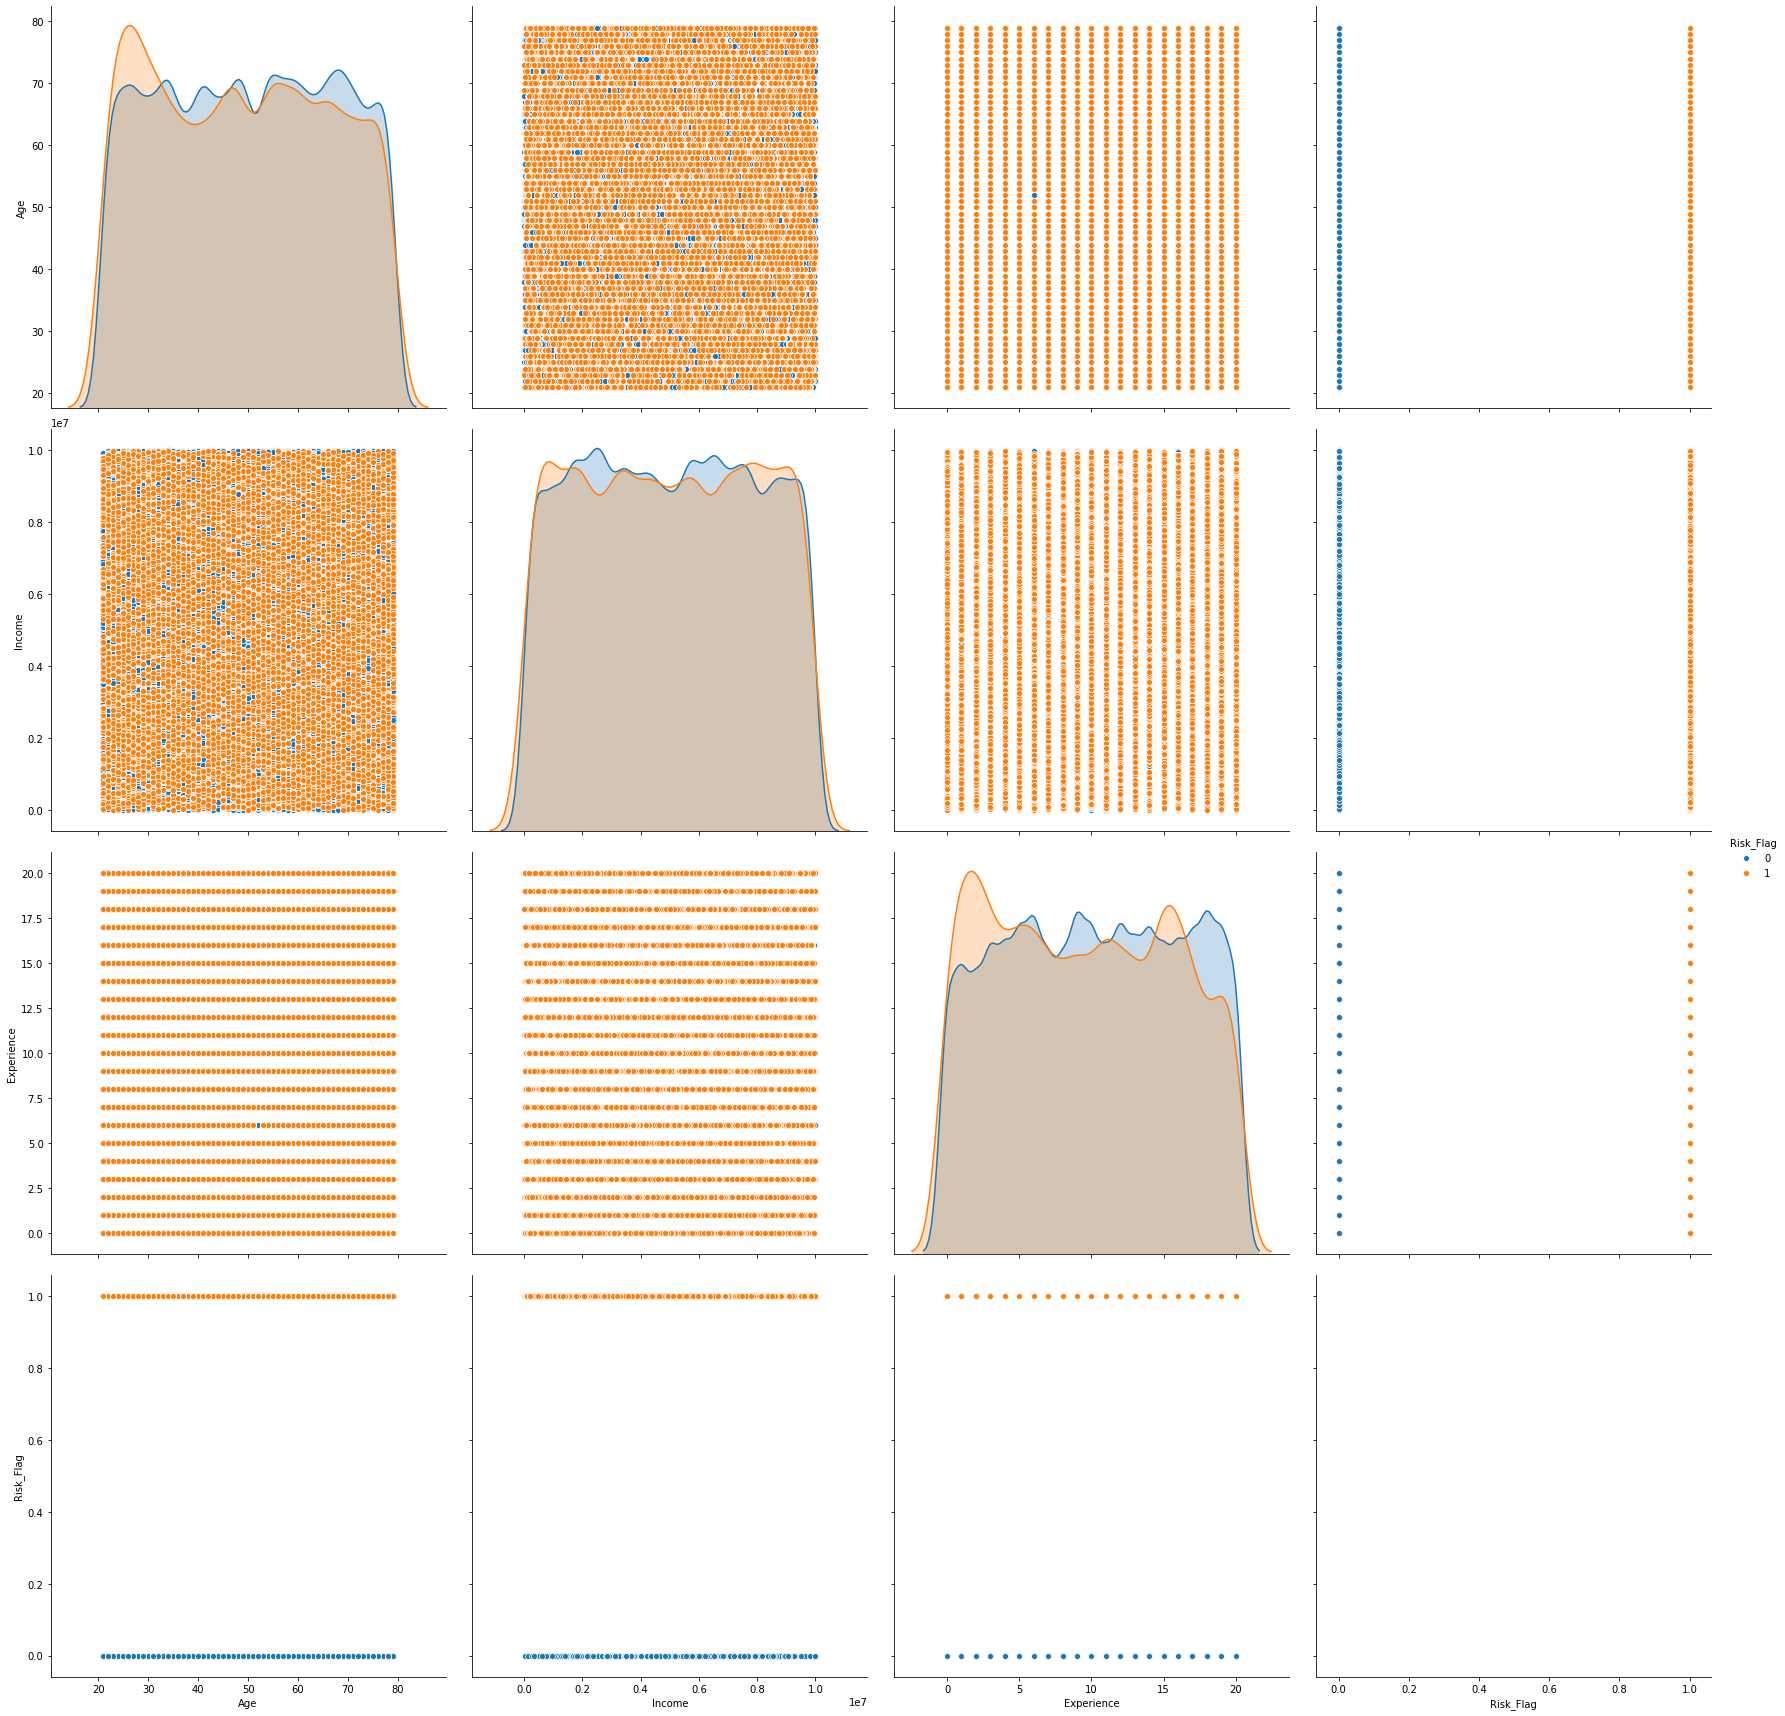

In [8]:
sns.pairplot(data=df[['Age', 'Income', 'Experience', 'Risk_Flag']], hue='Risk_Flag', height=6)

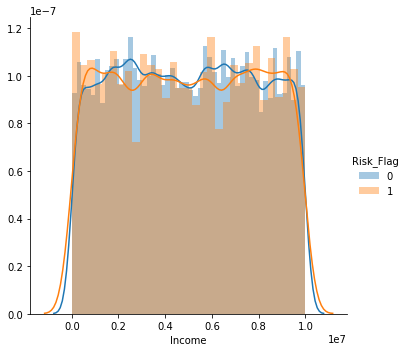

In [11]:
sns.FacetGrid(df, hue='Risk_Flag', height=5).map(sns.distplot, 'Income').add_legend()

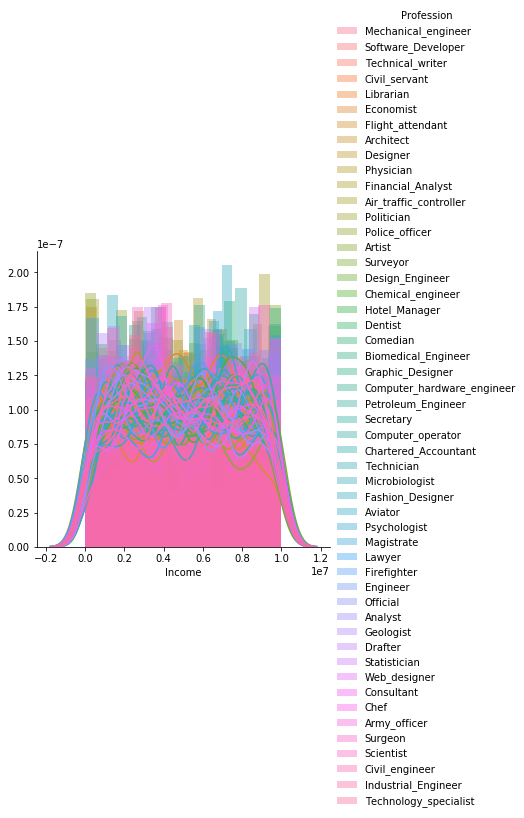

In [12]:
sns.FacetGrid(df, hue='Profession', height=5).map(sns.distplot, 'Income').add_legend()

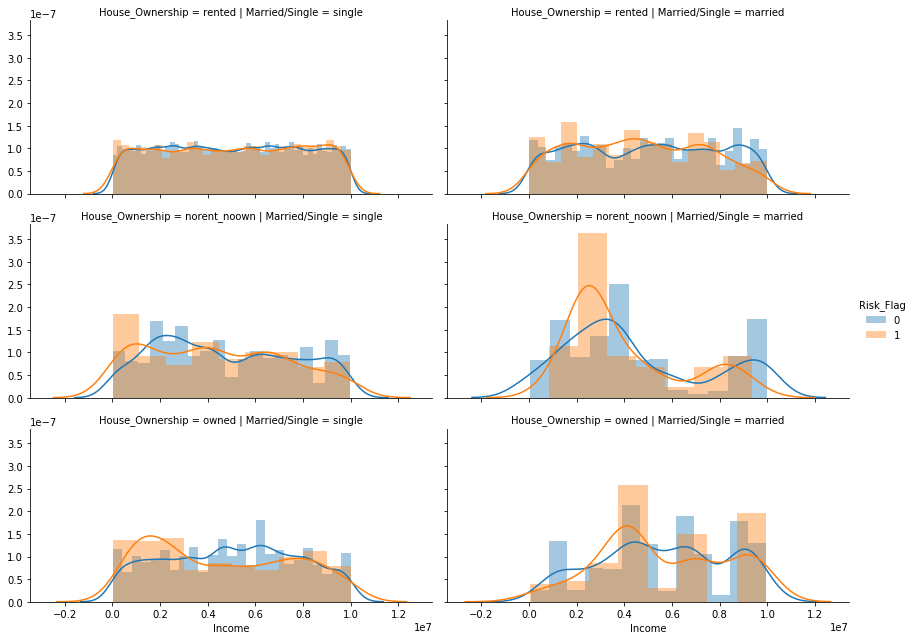

In [28]:
sns.FacetGrid(df, 
              hue='Risk_Flag', 
              row='House_Ownership', 
              col='Married/Single', 
              height=3, aspect=2).map(sns.distplot, 'Income').add_legend()

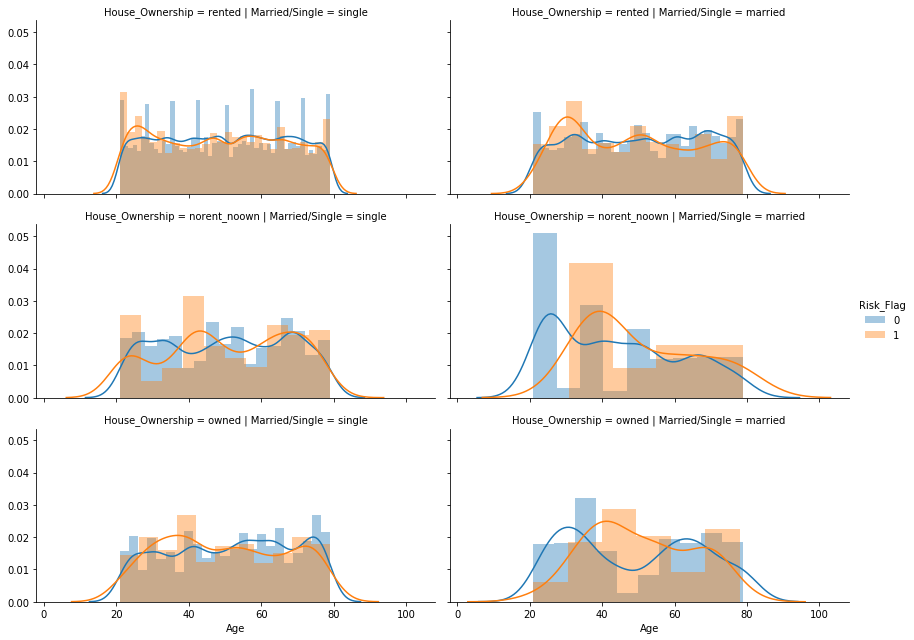

In [18]:
sns.FacetGrid(df, 
              hue='Risk_Flag', 
              row='House_Ownership', 
              col='Married/Single', 
              height=3, aspect=2).map(sns.distplot, 'Age').add_legend()

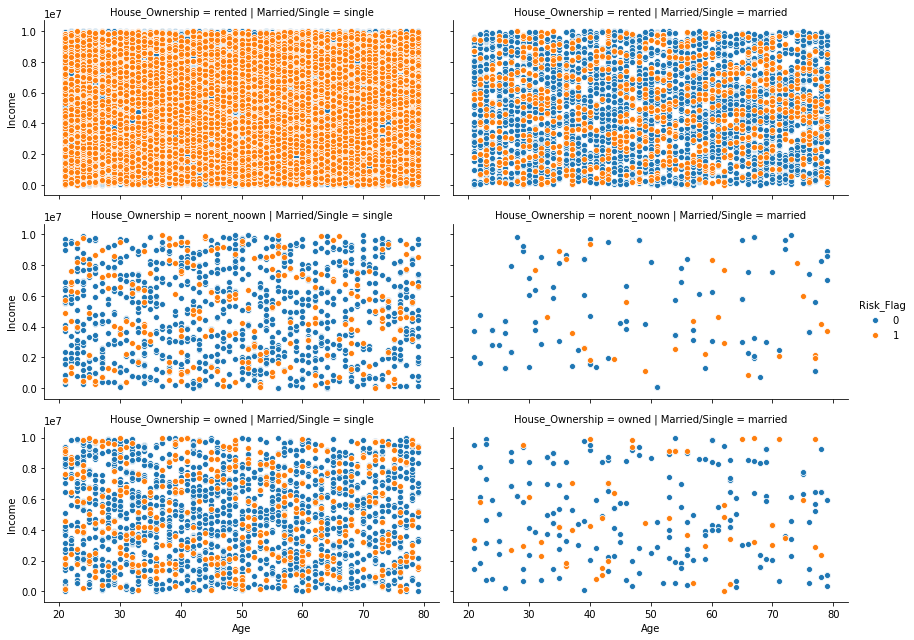

In [22]:
sns.FacetGrid(df, 
              hue='Risk_Flag', 
              row='House_Ownership', 
              col='Married/Single', 
              height=3, aspect=2).map(sns.scatterplot, 'Age', 'Income').add_legend()

/home/marek/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


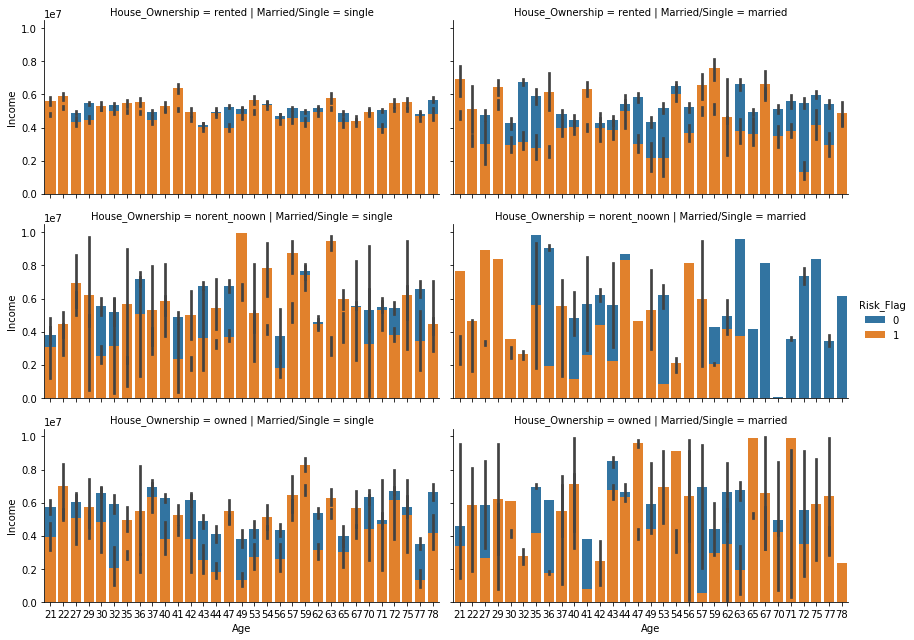

In [23]:
sns.FacetGrid(df, 
              hue='Risk_Flag', 
              row='House_Ownership', 
              col='Married/Single', 
              height=3, aspect=2).map(sns.barplot, 'Age', 'Income').add_legend()

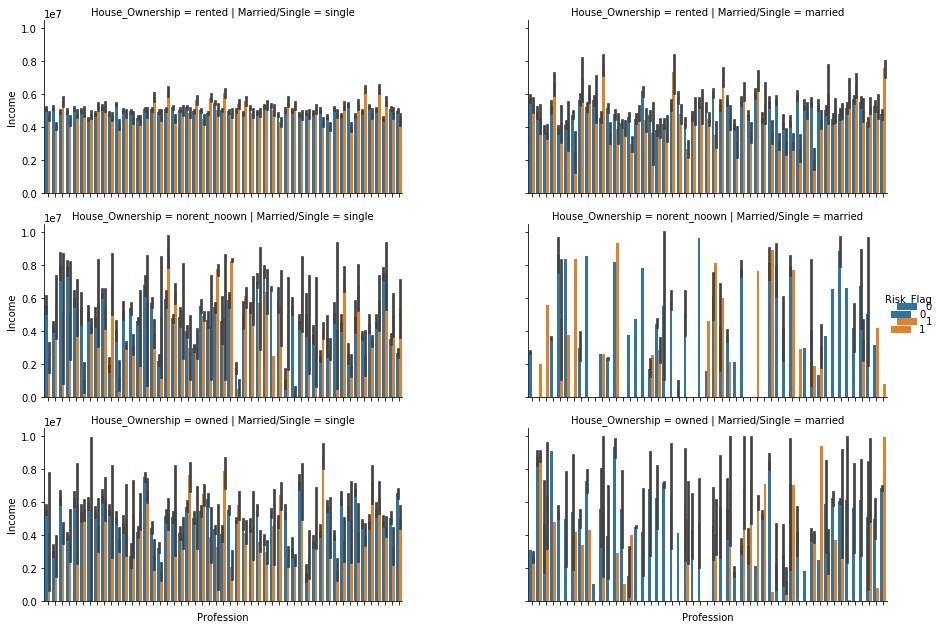

In [36]:
g = sns.catplot(data=df,
                x='Profession', 
                y='Income', 
                hue='Risk_Flag', 
                row='House_Ownership', 
                col='Married/Single', 
                height=3, 
                aspect=2, 
                kind='bar')
g.add_legend()
g.set_xticklabels(rotation=90)


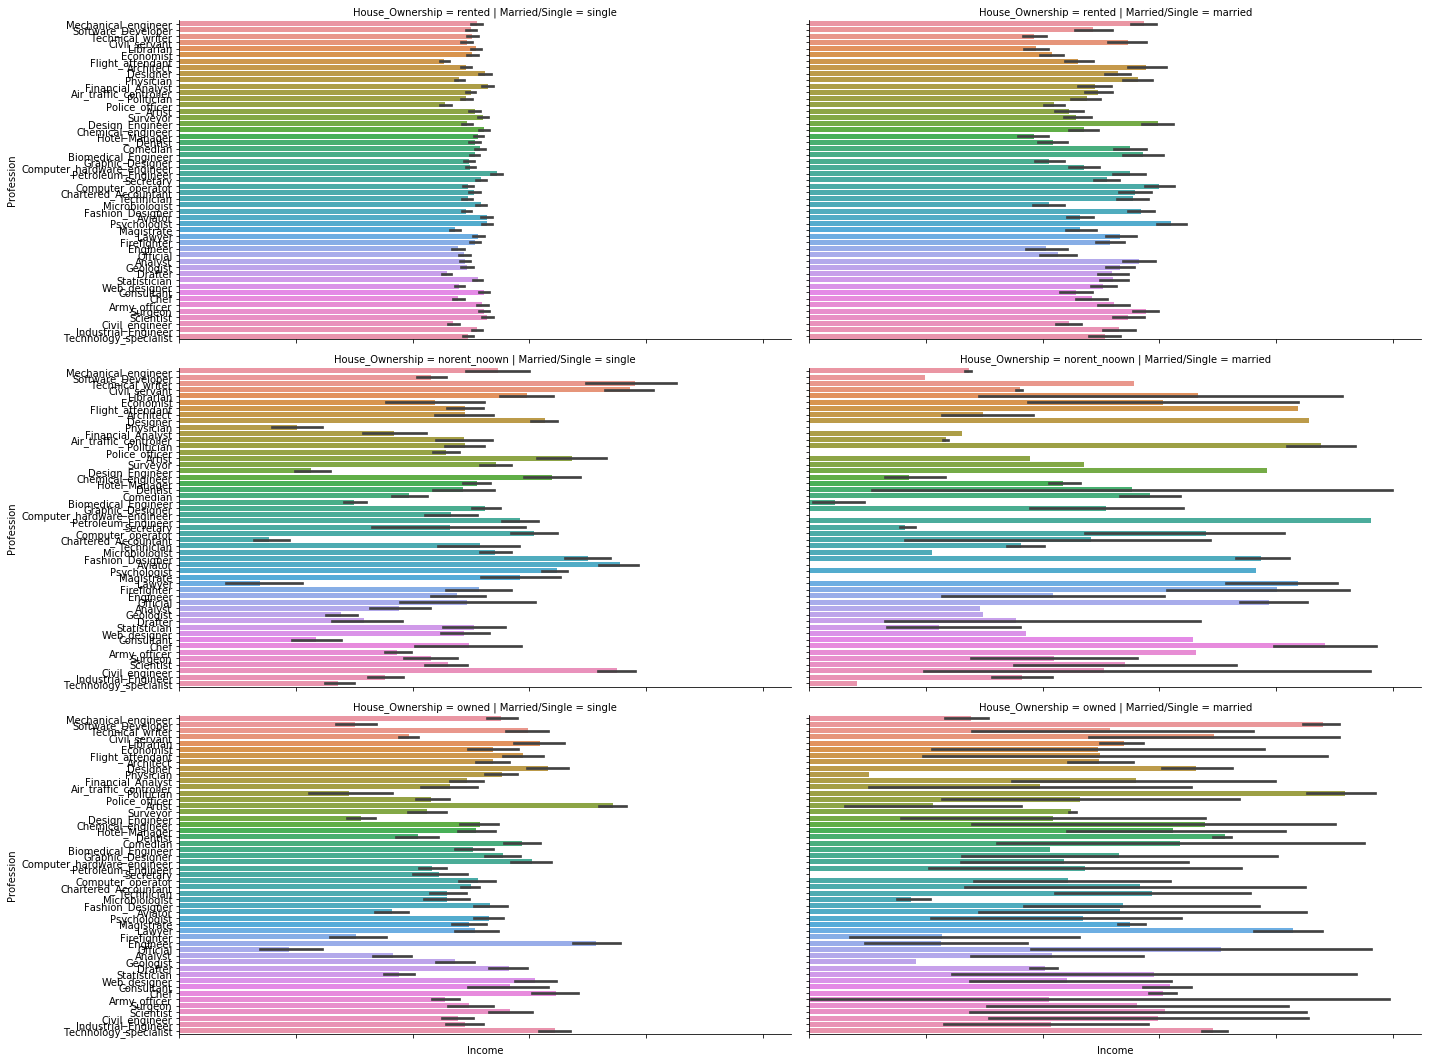

In [42]:
g = sns.catplot(data=df,
                y='Profession', 
                x='Income', 
#                 hue='Risk_Flag', 
                row='House_Ownership', 
                col='Married/Single', 
                height=5, 
                aspect=2, 
                kind='bar')
g.add_legend()
g.set_xticklabels(rotation=90)


In [49]:
df.groupby('Profession').Risk_Flag.value_counts().unstack()

Risk_Flag,0,1
Profession,,
Air_traffic_controller,4566,715
Analyst,4101,567
Architect,4046,611
Army_officer,3952,709
Artist,4265,596
Aviator,4116,642
Biomedical_Engineer,4473,654
Chartered_Accountant,3803,690
Chef,4072,563


In [61]:
percentage = df.groupby('Profession').Risk_Flag.sum()/df.groupby('Profession').Risk_Flag.count()*100
percentage = pd.Series(percentage, name='Percentage of risk by profession')
percentage.sort_values(ascending=False).head(10)

Profession
Police_officer          16.405164
Chartered_Accountant    15.357222
Army_officer            15.211328
Surveyor                15.146373
Software_Developer      14.842668
Scientist               14.432127
Geologist               14.426370
Civil_engineer          13.583189
Official                13.579643
Firefighter             13.578877
Name: Percentage of risk by profession, dtype: float64